In [11]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

In [13]:
df = pd.read_csv('Output/q_values_BCCfullset_source_code.txt', delimiter='\t', engine='c', low_memory=False, skiprows=[0])

In [45]:
df.head()

,gene,p_phi_neg,q_phi_neg,phi_neg,p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs
0,A1BG,0.561319,0.855803,0.920712,0.578853,1.000000,0.984521,10,0,5
1,A1CF,0.805210,0.947551,0.513796,0.056315,1.000000,4.004821,64,3,18
2,A2M,1.000000,1.000000,0.010210,0.000050,0.030323,11.514248,88,7,28
3,A2ML1,0.816204,0.952442,0.487447,0.041183,0.950218,4.365427,93,5,37
4,A3GALT2,0.982113,1.000000,0.134371,0.122953,1.000000,3.079383,6,0,0


In [14]:
ordered_phipos_df = df.sort_values('phi_pos_or_p(m=0|s)*p(k=0|s)', ascending=False)
ordered_phineg_df = df.sort_values('phi_neg', ascending=False)

Here are the first 20 genes listed in decreasing order of positive selection

In [15]:
ordered_phipos_df.iloc[:20]

,gene,p_phi_neg,q_phi_neg,phi_neg,p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs
12802,PTPN14,0.772873,0.933026,0.567455,0.000000,0.000000,100000.000000,29,37,18
16654,TP53,1.000000,1.000000,0.000000,0.000000,0.000000,68.044256,178,64,14
16212,TLR9,1.000000,1.000000,0.000008,0.000000,0.000000,40.549978,64,5,3
12743,PTCH1,1.000000,1.000000,0.002438,0.000000,0.000000,39.160062,68,100,24
968,ARHGAP35,1.000000,1.000000,0.009404,0.000000,0.000000,34.523909,44,20,12
5702,FAT1,0.258563,0.634460,1.772043,0.000000,0.000000,34.074596,122,40,69
7992,ITGB3,1.000000,1.000000,0.000100,0.000000,0.000000,27.473602,70,6,7
1007,ARID1A,0.702490,0.905071,0.695581,0.000000,0.000000,25.061746,57,23,28
12332,PPM1D,0.469709,0.801206,1.129463,0.000000,0.000000,23.388702,11,19,6
10878,NOTCH2,0.999444,1.000000,0.022880,0.000000,0.000000,21.594744,99,23,33


Take only the genes with q_pos-values lower than 0.1

In [16]:
q_phi_pos_bygene = []
q_phi_pos = []
for i in range(len(ordered_phipos_df)):
    if ordered_phipos_df['q_phi_pos'].iloc[i] < 0.1:
        q_phi_pos_bygene.append([ordered_phipos_df['gene'].iloc[i],ordered_phipos_df['q_phi_pos'].iloc[i]])
        q_phi_pos.append(ordered_phipos_df['q_phi_pos'].iloc[i])

In [17]:
q_phi_pos_bygene[:20]

[['PTPN14', 0.0],
 ['TP53', 0.0],
 ['TLR9', 0.0],
 ['PTCH1', 0.0],
 ['ARHGAP35', 0.0],
 ['FAT1', 0.0],
 ['ITGB3', 0.0],
 ['ARID1A', 0.0],
 ['PPM1D', 0.0],
 ['NOTCH2', 0.0],
 ['FAM109A', 0.0],
 ['GPX6', 0.0],
 ['TPTE', 0.0],
 ['TP63', 0.0],
 ['NOTCH1', 0.0],
 ['CDKN2A', 0.0],
 ['ASXL3', 0.0],
 ['TTN', 0.001052641],
 ['KMT2D', 0.001052641],
 ['NFKBIE', 0.004761946]]

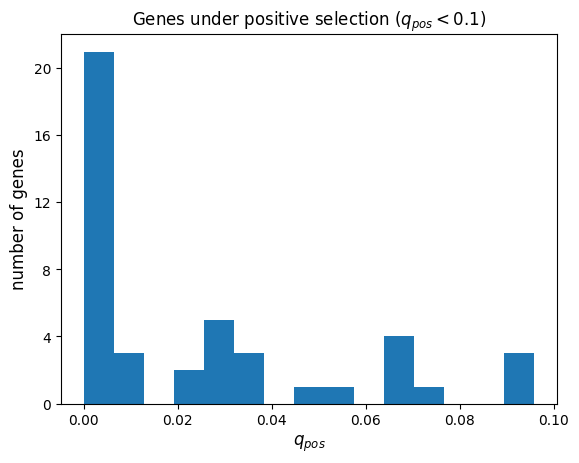

In [18]:
plt.hist(q_phi_pos, bins = 15)
plt.title(r'Genes under positive selection $(q_{pos} < 0.1)$')
plt.xlabel(r'$q_{pos}$', fontsize = 12)
plt.ylabel('number of genes', fontsize = 12)
y = np.arange(0,22, 4)
plt.yticks(y)
plt.savefig('q_graph_pos.png', dpi = 300)
plt.show()

In [19]:
len(q_phi_pos)

44

There are 44 genes with q_pos-values < 0.1 as calculated by CBaSE

From the histogram, most of these have q-values between 0 and 0.005

Need to check to see how many of these match with the known COSMIC cancer genes, then check if those that don't have been investigated by other studies

Below are the first 20 genes in decreasing order of negative selection

In [20]:
ordered_phineg_df.iloc[:20]

,gene,p_phi_neg,q_phi_neg,phi_neg,p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs
16851,TRIO,0.000000,0.000000,19.668690,1.000000,1.0,0.008283,72,4,100
1539,BCL2L12,0.000000,0.000000,17.614019,1.000000,1.0,0.006512,27,2,45
15193,SPG7,0.000000,0.000000,17.482285,1.000000,1.0,0.000012,16,0,27
17712,WFS1,0.000000,0.000000,16.591272,1.000000,1.0,0.006586,34,1,75
18655,ZZEF1,0.000000,0.000000,15.972964,0.927637,1.0,0.071340,66,7,87
14773,SLC6A4,0.000000,0.000000,15.706287,1.000000,1.0,0.000006,10,0,33
7912,IQGAP3,0.000000,0.000000,14.883235,0.934891,1.0,0.042070,21,2,53
4632,DOCK1,0.000001,0.001667,14.447927,1.000000,1.0,0.000058,42,0,54
17068,TUBB3,0.000001,0.001667,14.377740,1.000000,1.0,0.003693,35,1,34
16607,TNRC6A,0.000001,0.001667,14.182743,1.000000,1.0,0.006521,53,0,30


Take only the genes with q-neg values lower than 0.1

In [21]:
q_phi_neg_bygene = []
q_phi_neg = []
for i in range(len(ordered_phineg_df)):
    if ordered_phineg_df['q_phi_neg'].iloc[i] < 0.1:
        q_phi_neg_bygene.append([ordered_phineg_df['gene'].iloc[i], ordered_phineg_df['q_phi_neg'].iloc[i]])
        q_phi_neg.append(ordered_phineg_df['q_phi_neg'].iloc[i])

In [22]:
q_phi_neg_bygene[:20]

[['TRIO', 0.0],
 ['BCL2L12', 0.0],
 ['SPG7', 0.0],
 ['WFS1', 0.0],
 ['ZZEF1', 0.0],
 ['SLC6A4', 0.0],
 ['IQGAP3', 0.0],
 ['DOCK1', 0.001666681],
 ['TUBB3', 0.001666681],
 ['TNRC6A', 0.001666681],
 ['KLHL36', 0.001666681],
 ['BIRC6', 0.001666681],
 ['ZNF385B', 0.001904778],
 ['DIP2C', 0.001904778],
 ['MIP', 0.001904778],
 ['HELZ2', 0.001904778],
 ['BAD', 0.001904778],
 ['ZNF823', 0.001904778],
 ['THAP10', 0.001904778],
 ['MORF4L1', 0.001904778]]

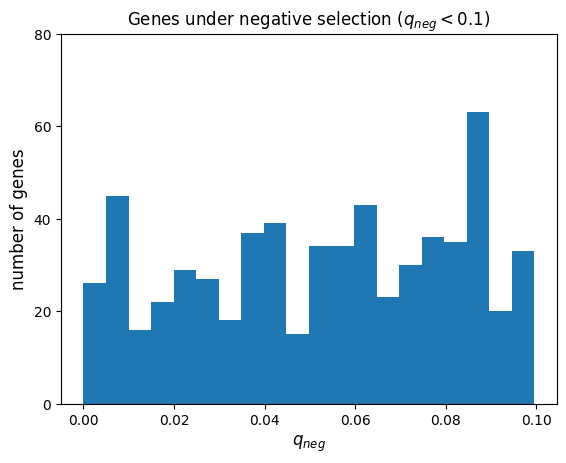

In [23]:
plt.hist(q_phi_neg, bins = 20)
plt.title(r'Genes under negative selection $(q_{neg} < 0.1)$')
plt.xlabel(r'$q_{neg}$', fontsize = 12)
plt.ylabel('number of genes', fontsize = 12)
y = np.arange(0,100, 20)
plt.yticks(y)
plt.savefig('q_graph_neg.png', dpi = 300)
plt.show()

In [24]:
len(q_phi_neg)

625

Can see from the histogram that there are far more genes with q-neg < 0.1 than there are genes with q-pos < 0.1

Must count how many genes with q-pos < 0.1 and q-neg < 0.1 are in the COSMIC known cancer gene list and WANG cell essential gene list

If there are many genes with q-neg/q-pos < 0.1 in those lists, then CBaSE has done a good job of detecting known cancer and cell essential genes.

Then see how many of those genes are leftover and search previous studies to see if they confirm the new genes found as cancer genes

In [47]:
cell_essG = pd.read_csv('Auxiliary/Wang_cell_essential_genes.txt', header=None)
known_cancer_genes = pd.read_csv('Auxiliary/COSMIC_genes_v80.txt', header=None)
cellEG = []
for i in range(len(cell_essG[0])):
    cellEG.append(cell_essG[0][i])
known_CG = []
for i in range(len(known_cancer_genes[0])):
    known_CG.append(known_cancer_genes[0][i])

In [48]:
cellEG[:10]

['ANAPC4',
 'BCR',
 'C21orf59',
 'CCT7',
 'CDC40',
 'CDK1',
 'CINP',
 'COPS3',
 'DDOST',
 'DDX27']

In [49]:
known_CG[:5]

['ABI1', 'ABL1', 'ABL2', 'ACKR3', 'ACSL3']

Check if the genes from q_phi_pos_bygene are in the COSMIC human cancer gene list:

If the gene is in the list, it is appended to matched_CG

If the gene is not in the list, it is appended to new_CG

In [50]:
matched_CG = []
new_CG = []
for i in range(len(q_phi_pos_bygene)):
    for j in range(len(known_CG)):
        if q_phi_pos_bygene[i][0] == known_CG[j]:
            matched_CG.append(q_phi_pos_bygene[i])
            break
        if j == (len(known_CG)-1):
            new_CG.append(q_phi_pos_bygene[i])

In [51]:
len(matched_CG)

12

In [52]:
matched_CG

[['TP53', 0.0],
 ['PTCH1', 0.0],
 ['FAT1', 0.0],
 ['ARID1A', 0.0],
 ['PPM1D', 0.0],
 ['NOTCH2', 0.0],
 ['TP63', 0.0],
 ['NOTCH1', 0.0],
 ['CDKN2A', 0.0],
 ['KMT2D', 0.001052641],
 ['NFKBIE', 0.004761946],
 ['RANBP17', 0.04914328]]

12/44 of the genes with q-pos < 0.1, as calculated by CBaSE, are already associated with cancer by previous studies.

Of these 12 genes, 9 of them have q-values of 0

This means CBaSE has most likely detected the correct cancer genes in the BCC data set.

In [53]:
len(new_CG)

32

In [54]:
new_CG

[['PTPN14', 0.0],
 ['TLR9', 0.0],
 ['ARHGAP35', 0.0],
 ['ITGB3', 0.0],
 ['FAM109A', 0.0],
 ['GPX6', 0.0],
 ['TPTE', 0.0],
 ['ASXL3', 0.0],
 ['TTN', 0.001052641],
 ['PTGER3', 0.004761946],
 ['SGSH', 0.008695727],
 ['CARD8', 0.008695727],
 ['SLC5A11', 0.01166677],
 ['ABCC12', 0.02080018],
 ['MIIP', 0.0246156],
 ['SCG3', 0.0264288],
 ['ASXL2', 0.0264288],
 ['USP29', 0.03032284],
 ['MUC19', 0.03032284],
 ['A2M', 0.03032284],
 ['TMEM35', 0.03687532],
 ['TMEM222', 0.03705914],
 ['GRIA4', 0.03705914],
 ['SEMA3E', 0.05500047],
 ['VNN3', 0.06789532],
 ['AGTRAP', 0.06789532],
 ['PON1', 0.06800058],
 ['USP44', 0.06800058],
 ['GNAL', 0.07122012],
 ['TOR1AIP1', 0.09209381],
 ['EYS', 0.09209381],
 ['BIVM-ERCC5', 0.09590991]]

32/44 of the genes with q-pos < 0.1, as calculated by CBaSE, are not in the COSMIC known cancer gene list.

Of these 32 genes, 9 of them have q-pos values of 0.

These genes must be checked against previous cancer stydies to see if they are already associated withh cancer. If not, further studies should be done to investigate the mechanisms which could associate cancer with these genes.

In [55]:
matched_EG = []
new_EG = []
for i in range(len(q_phi_neg_bygene)):
    for j in range(len(cellEG)):
        if q_phi_neg_bygene[i][0] == cellEG[j]:
            matched_EG.append(q_phi_neg_bygene[i])
            break
        if j == (len(cellEG)-1):
            new_EG.append(q_phi_neg_bygene[i])

In [56]:
matched_EG

[['BCR', 0.01740015]]

In [57]:
new_EG[:10]

[['TRIO', 0.0],
 ['BCL2L12', 0.0],
 ['SPG7', 0.0],
 ['WFS1', 0.0],
 ['ZZEF1', 0.0],
 ['SLC6A4', 0.0],
 ['IQGAP3', 0.0],
 ['DOCK1', 0.001666681],
 ['TUBB3', 0.001666681],
 ['TNRC6A', 0.001666681]]

In [58]:
len(cellEG)

77

In [59]:
len(new_EG)

624

Can see from this: only one of the genes in output of CBaSE with q-neg < 0.1 is in the WANG cell essential gene list. This is strange... could be explained by the fact that most cell essential genes are haplosufficient (i.e. can be same phenotype even if one allele is mutated)

When looking up the genes at the top of the q_neg_bygene list on the GeneCards website, find that most of these are associated with cancer and/or apoptosis.

This clearly indicates that CBaSE has worked well in identifying genes whose 'wild-type' coding sequences allow tumour growth.

Where in the list are the WANG cell essential genes? Atttempt to find below!

In [60]:
q_phi_neg_bygene2 = []
q_phi_neg2 = []
for i in range(len(ordered_phineg_df)):
    if ordered_phineg_df['q_phi_neg'].iloc[i] < 0.6:
        q_phi_neg_bygene2.append([ordered_phineg_df['gene'].iloc[i], ordered_phineg_df['q_phi_neg'].iloc[i]])
        q_phi_neg2.append(ordered_phineg_df['q_phi_neg'].iloc[i])

In [61]:
matched_EG2 = []
new_EG2 = []
for i in range(len(q_phi_neg_bygene2)):
    for j in range(len(cellEG)):
        if q_phi_neg_bygene2[i][0] == cellEG[j]:
            matched_EG2.append(q_phi_neg_bygene2[i])
            break
        if j == (len(cellEG)-1):
            new_EG2.append(q_phi_neg_bygene2[i])

In [62]:
matched_EG2

[['BCR', 0.01740015],
 ['SON', 0.1756462],
 ['RPL6', 0.1828123],
 ['WDR43', 0.1876057],
 ['POLR1A', 0.192216],
 ['RPL7A', 0.2029327],
 ['DYNC1H1', 0.2216201],
 ['CDC40', 0.2330616],
 ['HCFC1', 0.2560783],
 ['RPL27A', 0.2618817],
 ['MPHOSPH10', 0.2646473],
 ['RPL9', 0.2669111],
 ['RPS15A', 0.2738875],
 ['EIF3D', 0.2792382],
 ['STAT5B', 0.2823535],
 ['CINP', 0.3345088],
 ['DDOST', 0.346091],
 ['SRSF7', 0.346091],
 ['SNRNP27', 0.3705277],
 ['RPS7', 0.3818249],
 ['DDX27', 0.4357771],
 ['RPL32', 0.4396979],
 ['GLTSCR2', 0.460917],
 ['SAP30BP', 0.460917],
 ['RSL24D1', 0.5011881],
 ['CDK1', 0.5144473],
 ['PES1', 0.5195038],
 ['GON4L', 0.5195038],
 ['MIS12', 0.5284034],
 ['EEF1A1', 0.5359906],
 ['NR2C2AP', 0.5503632],
 ['RPS3A', 0.5549698],
 ['UTP15', 0.5682032]]

In [63]:
len(matched_EG2)

33

By increasing the search of Wang cell-essential genes to those with q-neg < 0.6, we then find that there are 34 matches. The first match is of course 'BCR' which was found when q-neg < 0.1 but the rest have q-values ranging from 0.17 to 0.59

Attempt to plot a histogram with phi values for the genes with lowest q-pos values

In [64]:
phi_pos_bygene = []
phi_pos = []
for i in range(len(ordered_phipos_df)):
    if ordered_phipos_df['q_phi_pos'].iloc[i] < 0.1:
        phi_pos_bygene.append([ordered_phipos_df['gene'].iloc[i],ordered_phipos_df['phi_pos_or_p(m=0|s)*p(k=0|s)'].iloc[i]])
        phi_pos.append(ordered_phipos_df['phi_pos_or_p(m=0|s)*p(k=0|s)'].iloc[i])

In [65]:
phi_pos_bygene[:20]

[['PTPN14', 100000.0],
 ['TP53', 68.044256],
 ['TLR9', 40.549978],
 ['PTCH1', 39.160062],
 ['ARHGAP35', 34.523909],
 ['FAT1', 34.074596],
 ['ITGB3', 27.473602],
 ['ARID1A', 25.061746],
 ['PPM1D', 23.388702],
 ['NOTCH2', 21.594744],
 ['FAM109A', 21.300559],
 ['GPX6', 17.024257],
 ['TPTE', 16.974408],
 ['TP63', 16.838776],
 ['NOTCH1', 16.572229],
 ['CDKN2A', 16.558754],
 ['ASXL3', 16.549837],
 ['TTN', 16.146017],
 ['KMT2D', 15.817785],
 ['NFKBIE', 14.493694]]

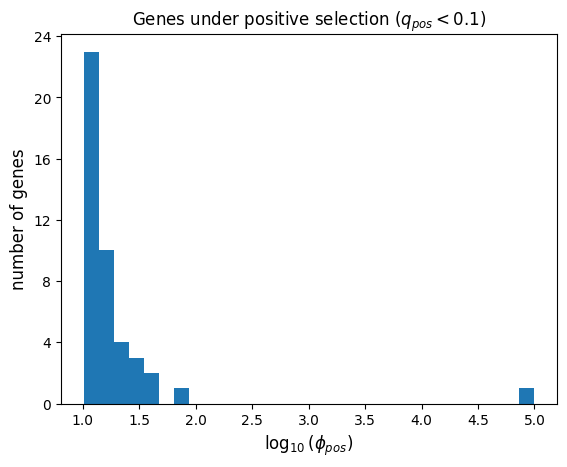

In [66]:
plt.hist(np.log10(phi_pos), bins = 30)
plt.title(r'Genes under positive selection $(q_{pos} < 0.1)$')
plt.xlabel(r'$\log_{10}$($\phi_{pos}$)', fontsize = 12)
plt.ylabel('number of genes', fontsize = 12)
y = np.arange(0,25, 4)
plt.yticks(y)
plt.savefig('phi_graph_pos.png', dpi = 300)
plt.show()

Now to plot a histogram of phi-neg values for the genes under negative selection

In [67]:
phi_neg_bygene = []
phi_neg = []
for i in range(len(ordered_phineg_df)):
    if ordered_phineg_df['q_phi_neg'].iloc[i] < 0.1:
        phi_neg_bygene.append([ordered_phineg_df['gene'].iloc[i], ordered_phineg_df['phi_neg'].iloc[i]])
        phi_neg.append(ordered_phineg_df['phi_neg'].iloc[i])

In [68]:
phi_neg_bygene[:20]

[['TRIO', 19.66869],
 ['BCL2L12', 17.614019],
 ['SPG7', 17.482285],
 ['WFS1', 16.591272],
 ['ZZEF1', 15.972964],
 ['SLC6A4', 15.706287],
 ['IQGAP3', 14.883235],
 ['DOCK1', 14.447927],
 ['TUBB3', 14.37774],
 ['TNRC6A', 14.182743],
 ['KLHL36', 14.021076],
 ['BIRC6', 13.869388],
 ['ZNF385B', 13.548345],
 ['DIP2C', 13.134542],
 ['MIP', 12.882569],
 ['HELZ2', 12.872262],
 ['BAD', 12.871743],
 ['ZNF823', 12.869534],
 ['THAP10', 12.759462],
 ['MORF4L1', 12.727439]]

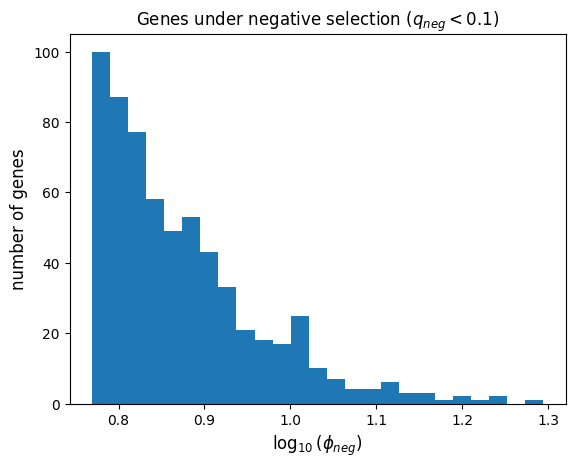

In [69]:
plt.hist(np.log10(phi_neg), bins = 25)
plt.title(r'Genes under negative selection ($q_{neg} < 0.1$)')
plt.xlabel(r'$\log_{10}$($\phi_{neg}$)', fontsize = 12)
plt.ylabel('number of genes', fontsize = 12)
#y = np.arange(0,28, 4)
#plt.yticks(y)
plt.savefig('phi_graph_neg.png', dpi = 300)
plt.show()

Can now see that despite the fact that there are far more genes with q-neg < 0.1 than there are genes with q-pos < 0.1, the genes with q-pos < 0.1 have larger values of phi and are thus more strongly selected

This shows that the results are more or less as expected